In [12]:
import cv2
import numpy as np

src = cv2.imread("../images/rose1.jpg")   # 입력 영상 불러오기
data = src.reshape((-1, 3)).astype(np.float32) #픽셀수만큼의 행*3채널로 차원 변환 & np.float32 자료형 변환
src.shape
# K-means 알고리즘
criteria = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #10번 반복 중 정확도 1.0이 되면 중단

for K in range(2, 20):
    print("K:", K)
    ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # 군집화 결과를 이용하여 출력 영상 생성
    center = np.uint8(center)
    dst = center[label.flatten()]  # 각 픽셀을 K개 군집 중심 색상으로 치환
    dst = dst.reshape((src.shape))

    cv2.imshow("src", src)
    cv2.imshow("dst", dst)
    cv2.waitKey()
    if K == 8:
        print("\ncenter :\n {}".format(center))
        print("\nlabel :\n {}".format(label)) # ex)1, 2, 2, 0 ... : 첫번째 픽셀은 1번째 군집, 두번째 픽셀은 2번째 군집...
        print("\nlabelflatten() :\n {}".format(label.flatten()))
        print("\ncenter[label.flatten()] :\n {}".format(center[label.flatten()]))
        break
    
cv2.destroyAllWindows()

K: 2
K: 3
K: 4
K: 5
K: 6
K: 7
K: 8

center :
 [[ 23  13 166]
 [ 12 180 225]
 [ 90 202 207]
 [164 160  49]
 [110  30 215]
 [110  80  16]
 [ 20  19  17]
 [ 19 129 141]]

label :
 [[5]
 [5]
 [6]
 ...
 [6]
 [6]
 [6]]

labelflatten() :
 [5 5 6 ... 6 6 6]

center[label.flatten()] :
 [[110  80  16]
 [110  80  16]
 [ 20  19  17]
 ...
 [ 20  19  17]
 [ 20  19  17]
 [ 20  19  17]]


### BGR 3차원 산점도로 군집 보기

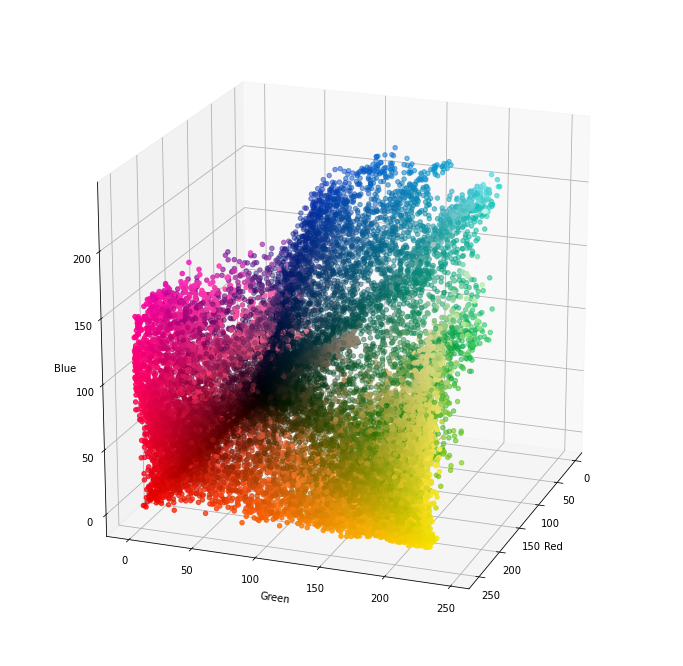

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

src = cv2.imread("../images/rose1.jpg") #입력 영상 불러오기
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) #scatter는 rgb를 사용하므로 RGB색공간으로 변환
src = cv2.resize(src, None, fx=0.3, fy=0.3) #픽셀 간 구분감을 위해 리사이즈
# cv2.imshow("src", src)
# cv2.waitKey()
# cv2.destroyAllWindows()

r, g, b = [], [], []
for row in src:
    for col in row:
        r.append(col[0])
        g.append(col[1])
        b.append(col[2])
r = np.array(r)
g = np.array(g)
b = np.array(b)
color = src.reshape(-1,3)/255.0

xmin, xmax, ymin, ymax, zmin, zmax = 0, 255, 0, 255, 0, 255

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.view_init(20, 20)
ax.scatter(r, g, b, c=color, marker="o")
plt.show()

#애니메이션 제작용
# for i in range(1, 361):
#     fig = plt.figure(figsize=(12, 12))
#     ax = fig.add_subplot(111, projection="3d")
#     ax.set_xlabel("Red")
#     ax.set_ylabel("Green")
#     ax.set_zlabel("Blue")
#     ax.view_init(i, i+60)
#     ax.scatter(r, g, b, c=color, marker="o")
#     plt.savefig(r"C:\Users\hrdkdh\Desktop\figure\fig_{}.png".format(i))

### HSV 2차원 산점도로 군집 보기

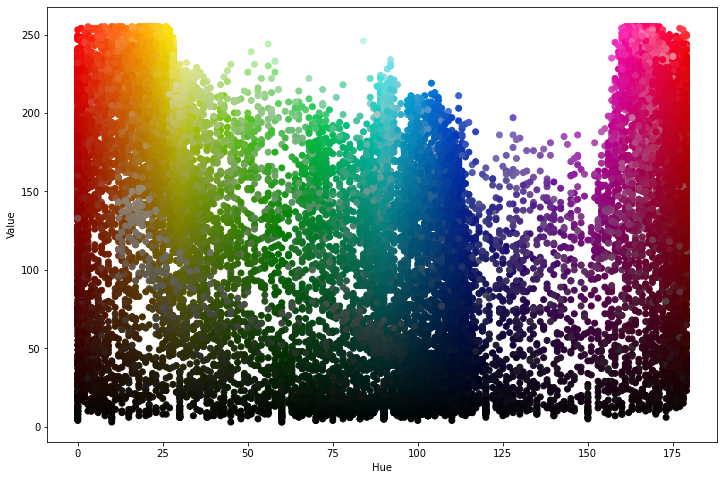

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

src = cv2.imread("../images/rose1.jpg") #입력 영상 불러오기
src = cv2.resize(src, None, fx=0.3, fy=0.3) #픽셀 간 구분감을 위해 리사이즈
src_for_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
color = src_for_color.reshape(-1,3)/255.0

src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, v = [], []
for row in src:
    for col in row:
        h.append(col[0])
        v.append(col[2])
h = np.array(h)
v = np.array(v)

xmin, xmax, ymin, ymax = 0, 180, 0, 255

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("Hue")
ax.set_ylabel("Value")
ax.scatter(h, v, c=color, marker="o")
plt.show()

### HSV 3차원 산점도로 군집 보기

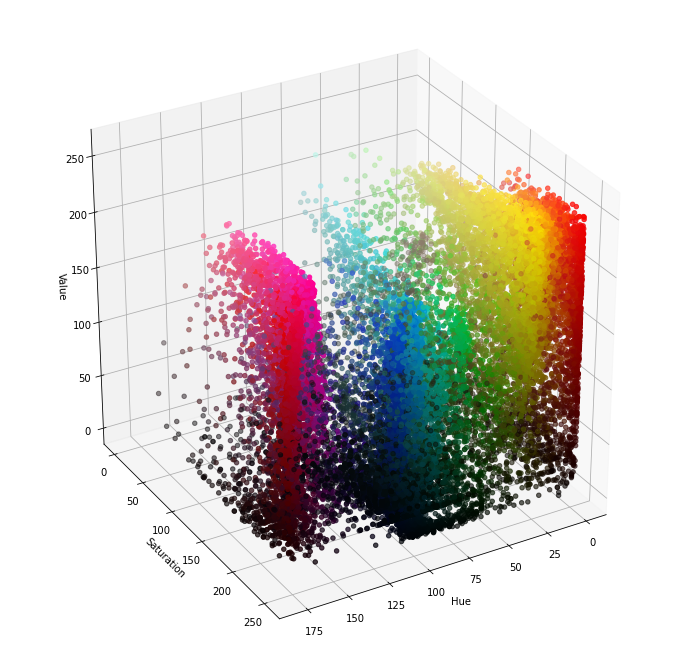

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

src = cv2.imread("../images/rose1.jpg") #입력 영상 불러오기
src = cv2.resize(src, None, fx=0.3, fy=0.3) #픽셀 간 구분감을 위해 리사이즈
src_for_color = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
color = src_for_color.reshape(-1,3)/255.0

src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = [], [], []
for row in src:
    for col in row:
        h.append(col[0])
        s.append(col[1])
        v.append(col[2])
h = np.array(h)
s = np.array(s)
v = np.array(v)

xmin, xmax, ymin, ymax, zmin, zmax = 0, 180, 0, 255, 0, 255

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")
ax.view_init(30, 60)
ax.scatter(h, s, v, c=color, marker="o")
plt.show()